In [ ]:
- Draw a dendogram if possible

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [4]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from scipy.cluster.hierarchy import dendrogram

#Birch does not scale well in high dimensions
#n_clusters=n_clusters,

## Parameter Grid Search 

In [6]:
metrics = ["euclidean", "cityblock"] #removing "cosine" since it can't be used when X contains zero vectors
linkages = ["average", "single", "complete", "ward"]
n_clusters = 10

In [7]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [8]:
def grid_search(logs, gram, min_df):
     
    X = get_features(logs, gram, min_df)
    X = X.toarray()
    
    result_header = ["Metric", "Linkage", "VMeasure", "Fowlkes-Mallows"]
    results = []
    
    for metric in metrics:
        for linkage in linkages:
            if not (linkage == "ward" and metric == "cityblock"):
                model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity=metric, compute_distances=True)
                model.fit(X)
                
                labels = model.labels_

                plt.figure()
                plt.suptitle("AgglomerativeClustering(gram=%d,affinity=%s,linkage=%s)" % (gram,metric,linkage), size=14)

                plot_dendrogram(model, truncate_mode='level', p=4)
                
                vm = evaluate_vmeasure(log_labels, labels)
                fm = evaluate_fm(log_labels, labels)
                
                result = [metric, linkage, vm, fm]
                results.append(result)
                
    tab_results(result_header, results)         
            

+-----------+----------+----------------------+---------------------+
|   Metric  | Linkage  |       VMeasure       |   Fowlkes-Mallows   |
+-----------+----------+----------------------+---------------------+
| euclidean | average  |  0.8189248038526549  |  0.6466796598367943 |
| euclidean |  single  | 0.012725561069443031 | 0.32190445162425335 |
| euclidean | complete |  0.7573281675757155  |  0.6340187252649871 |
| euclidean |   ward   |  0.7821735965415088  |  0.6189157161801777 |
| cityblock | average  |  0.3306119949999089  | 0.32649453804340967 |
| cityblock |  single  | 0.23874087661296323  | 0.31239877278699074 |
| cityblock | complete |  0.3302871940282285  |  0.3265017437931675 |
+-----------+----------+----------------------+---------------------+


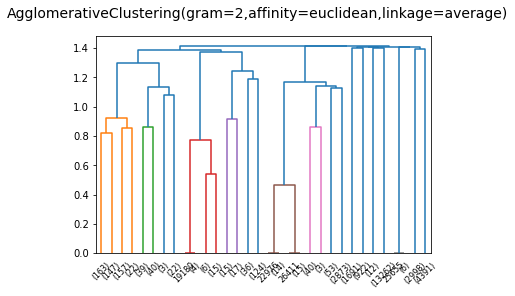

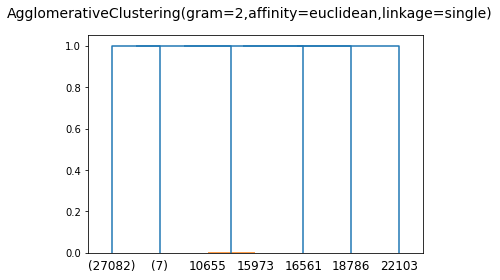

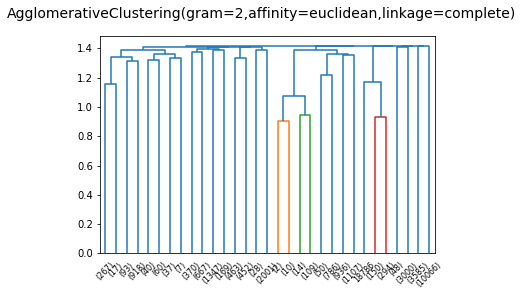

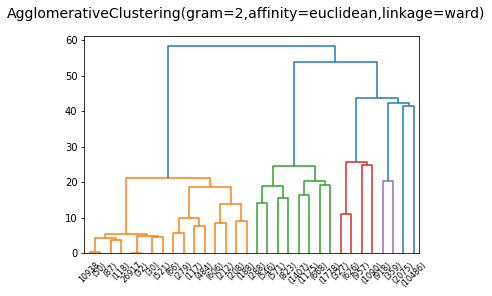

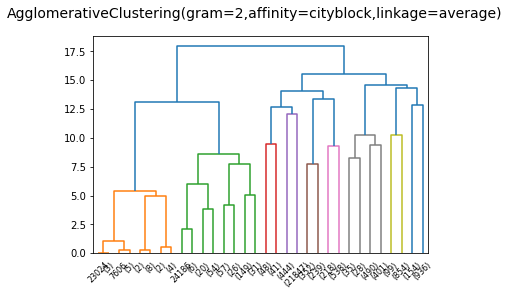

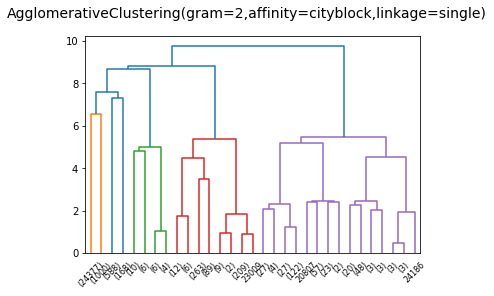

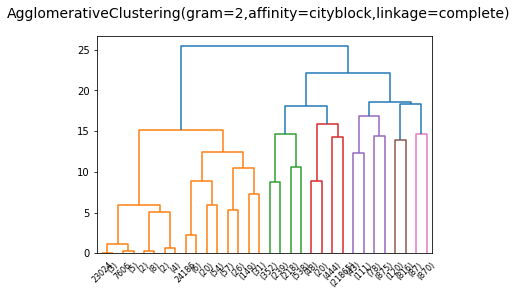

In [8]:
grid_search(logs, 2, 30)

+-----------+----------+---------------------+---------------------+
|   Metric  | Linkage  |       VMeasure      |   Fowlkes-Mallows   |
+-----------+----------+---------------------+---------------------+
| euclidean | average  |  0.8185577716196715 |  0.6460866307808305 |
| euclidean |  single  |  0.075489370977386  |  0.3112572203154693 |
| euclidean | complete |  0.7653923066085809 |  0.6433591194687908 |
| euclidean |   ward   |  0.7781473866753275 |  0.6152334614184626 |
| cityblock | average  |  0.3503643963498948 | 0.32895010841500644 |
| cityblock |  single  | 0.21117754007282283 |  0.3113062494993628 |
| cityblock | complete |  0.4177232019969834 | 0.34216175395516846 |
+-----------+----------+---------------------+---------------------+


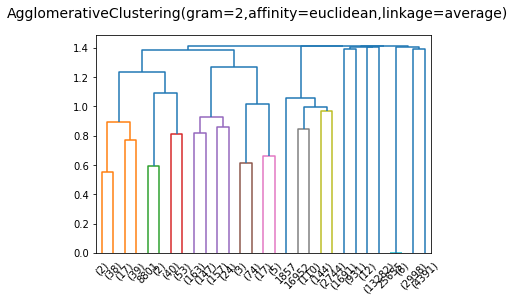

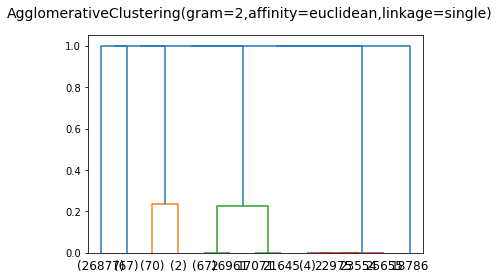

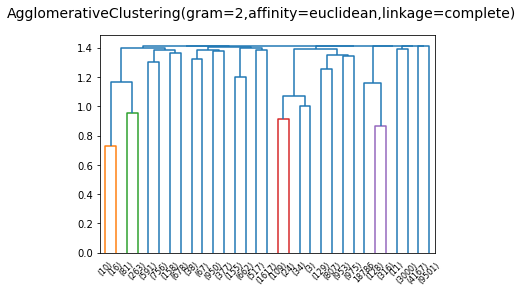

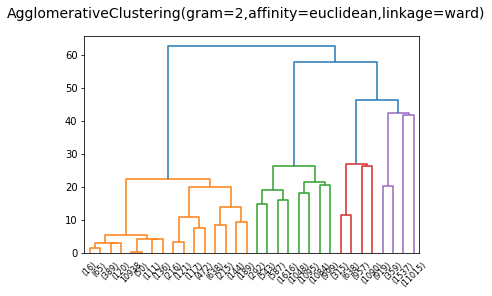

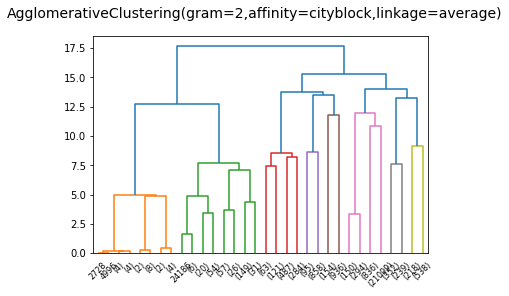

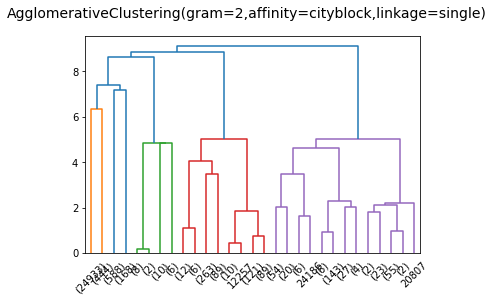

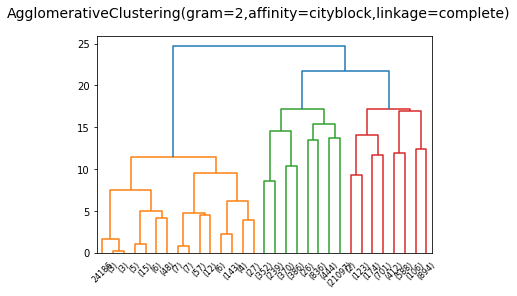

In [9]:
grid_search(logs, 2, 80)

+-----------+----------+---------------------+---------------------+
|   Metric  | Linkage  |       VMeasure      |   Fowlkes-Mallows   |
+-----------+----------+---------------------+---------------------+
| euclidean | average  |  0.7360805991315568 |  0.5466664219681553 |
| euclidean |  single  |  0.5054363190656429 |  0.3995300129360238 |
| euclidean | complete |  0.7664679065290025 |  0.6279516857521376 |
| euclidean |   ward   |  0.8157147509347532 |  0.6585618207386825 |
| cityblock | average  |  0.3503643963498948 | 0.32895010841500644 |
| cityblock |  single  | 0.20805827761793044 |  0.3109698536649021 |
| cityblock | complete |  0.3990081254396456 |  0.3385486347654809 |
+-----------+----------+---------------------+---------------------+


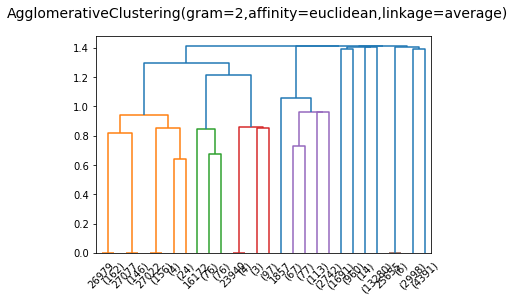

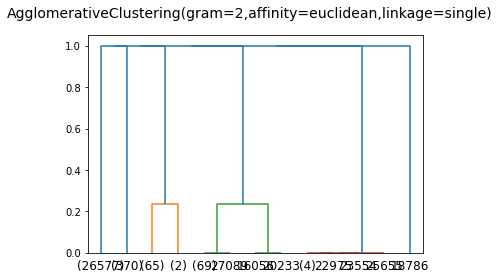

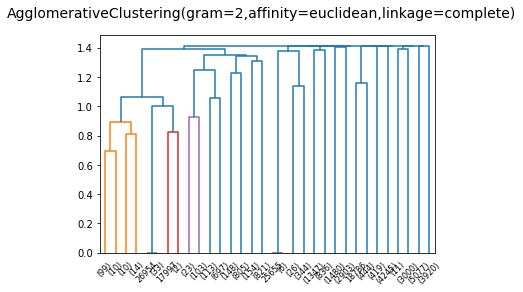

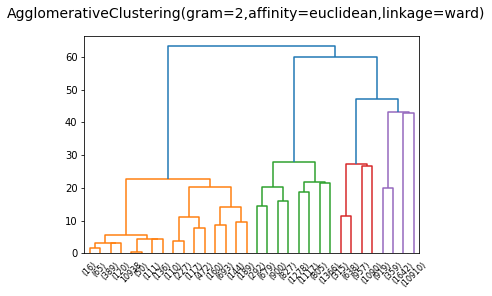

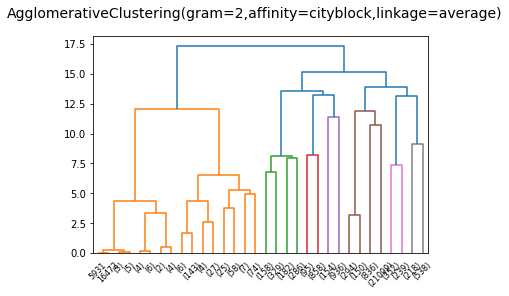

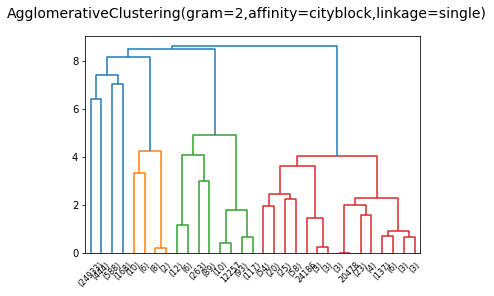

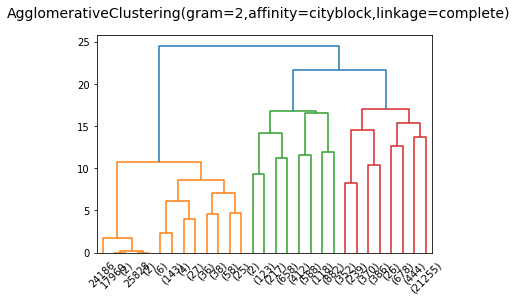

In [9]:
grid_search(logs, 2, 100)

+-----------+----------+---------------------+---------------------+
|   Metric  | Linkage  |       VMeasure      |   Fowlkes-Mallows   |
+-----------+----------+---------------------+---------------------+
| euclidean | average  |  0.8817316483603181 |  0.7694022339892538 |
| euclidean |  single  | 0.03182064386107695 |  0.317810641747353  |
| euclidean | complete |  0.7161273031216523 |  0.5968362812629413 |
| euclidean |   ward   |  0.7650729218302158 |  0.6004735474574917 |
| cityblock | average  | 0.32889338340194324 |  0.3264020135131594 |
| cityblock |  single  | 0.12587136009115668 | 0.31504384253906265 |
| cityblock | complete | 0.35472475610420867 |  0.3305307490686545 |
+-----------+----------+---------------------+---------------------+


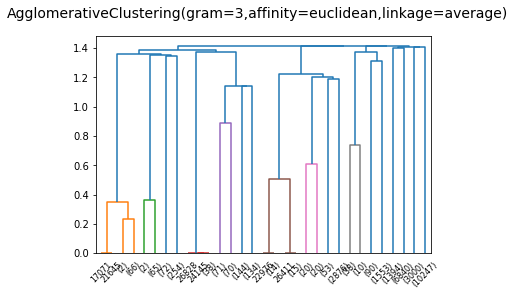

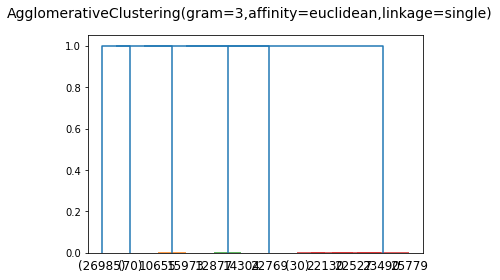

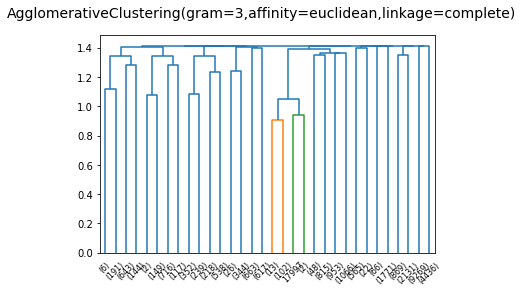

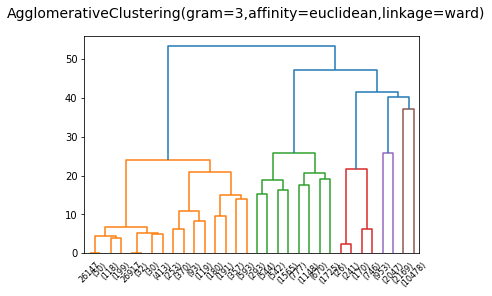

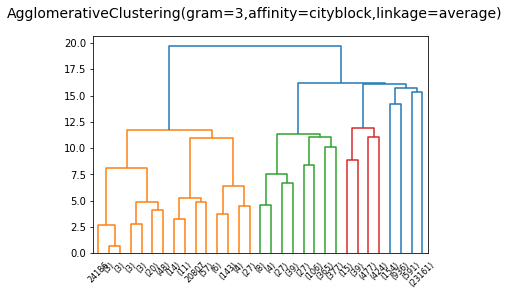

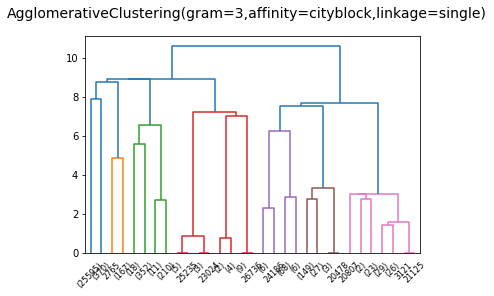

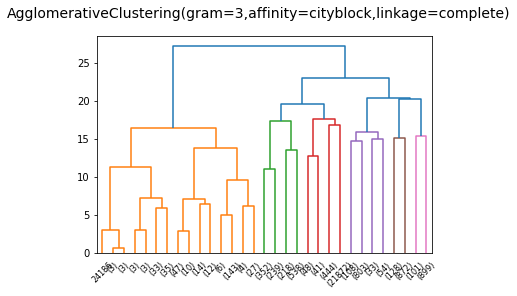

In [10]:
grid_search(logs, 3, 30)

+-----------+----------+---------------------+---------------------+
|   Metric  | Linkage  |       VMeasure      |   Fowlkes-Mallows   |
+-----------+----------+---------------------+---------------------+
| euclidean | average  |  0.8122386218676363 |  0.6411007547055896 |
| euclidean |  single  |  0.5997082859172456 |  0.4296869463978932 |
| euclidean | complete |  0.7708102467076551 |  0.6858334946912928 |
| euclidean |   ward   |  0.8114877396512589 |  0.6603817568578519 |
| cityblock | average  | 0.32493300366348404 |  0.3251692971191553 |
| cityblock |  single  | 0.15703354481872636 |  0.3167442950805321 |
| cityblock | complete |  0.3524952820698264 | 0.33031198171491283 |
+-----------+----------+---------------------+---------------------+


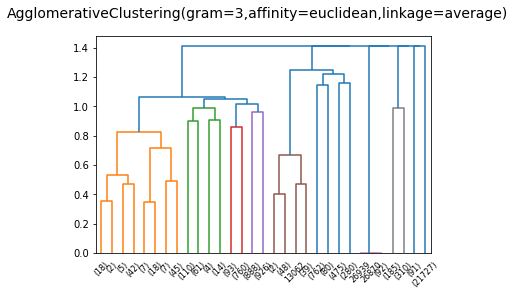

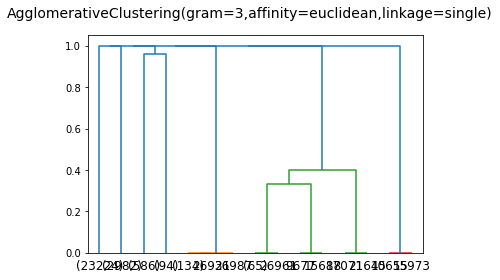

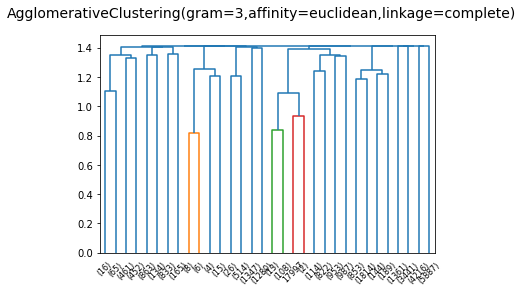

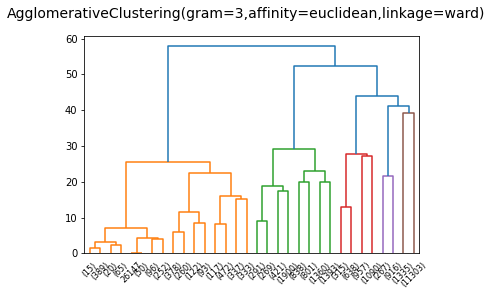

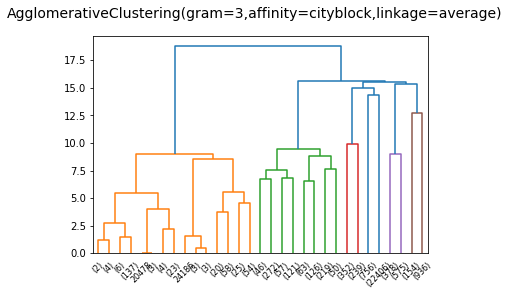

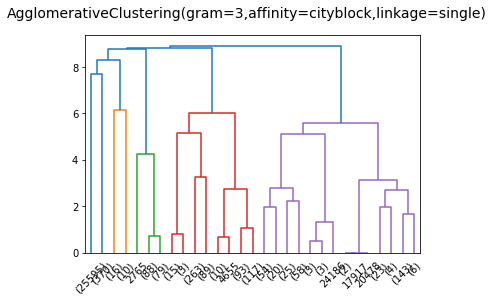

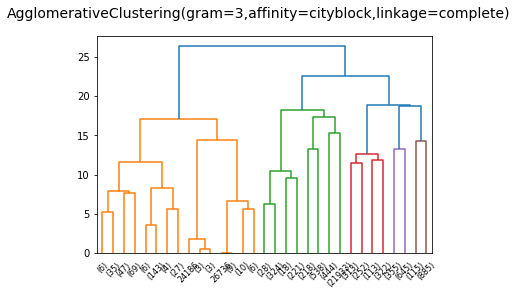

In [11]:
grid_search(logs, 3, 90)

+-----------+----------+---------------------+---------------------+
|   Metric  | Linkage  |       VMeasure      |   Fowlkes-Mallows   |
+-----------+----------+---------------------+---------------------+
| euclidean | average  |  0.9012599666490861 |  0.7785662152218663 |
| euclidean |  single  |  0.5519620398424547 |  0.4019280050260798 |
| euclidean | complete |  0.7682191564897128 |  0.6718720615300872 |
| euclidean |   ward   |  0.8158282596930725 |  0.6644577721130356 |
| cityblock | average  |  0.3255445653339291 | 0.32591414496111804 |
| cityblock |  single  | 0.23860433138489556 |  0.3123955969113746 |
| cityblock | complete |  0.3520343912896325 | 0.33026281213141717 |
+-----------+----------+---------------------+---------------------+


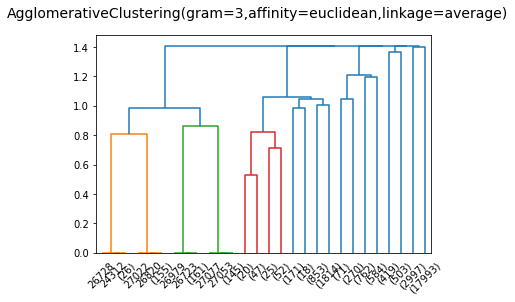

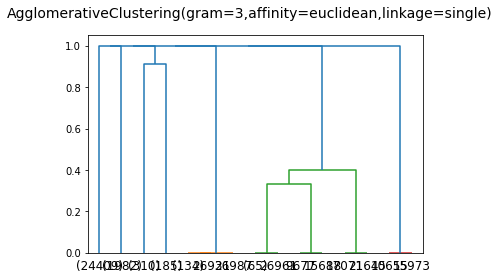

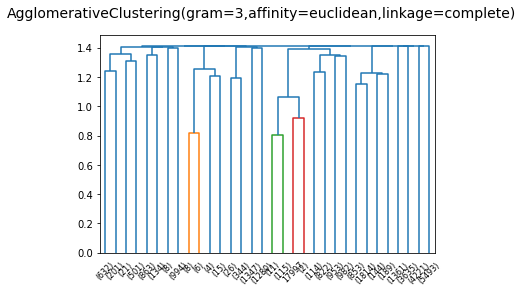

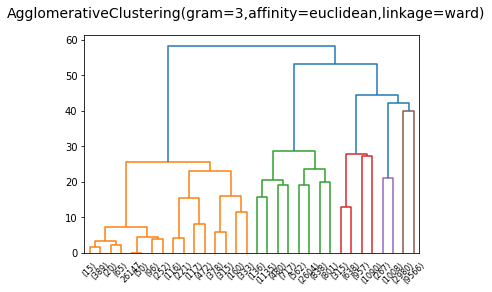

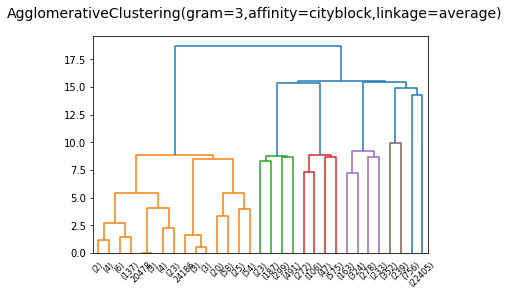

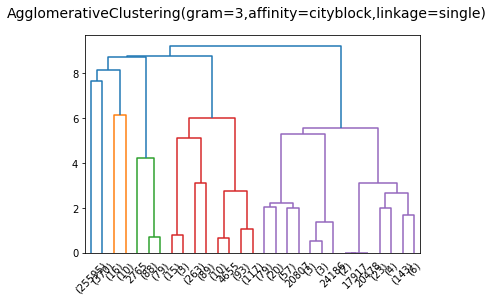

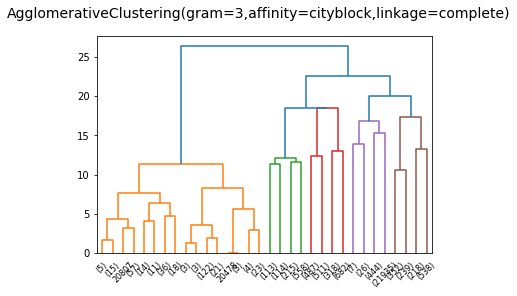

In [10]:
grid_search(logs, 3, 100)

## Bigram Feature Vectorizer

In [38]:
eval_results = []

In [39]:
tfidf_vectors = get_features(logs, 2, 100)

In [40]:
model = AgglomerativeClustering(n_clusters=n_clusters, linkage="average", affinity="euclidean", compute_distances=True)
tfidf_vectors = tfidf_vectors.toarray()
model.fit(tfidf_vectors)

AgglomerativeClustering(compute_distances=True, linkage='average',
                        n_clusters=10)

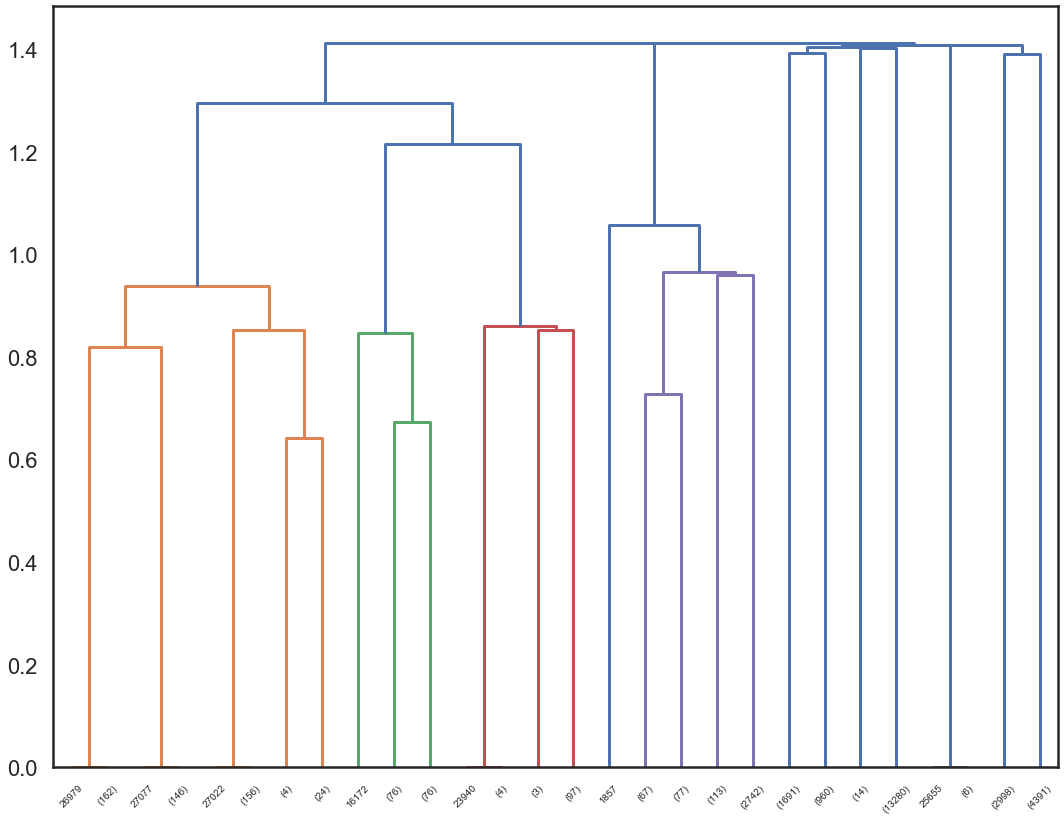

In [41]:
labels = model.labels_

plot_dendrogram(model, truncate_mode='level', p=4)

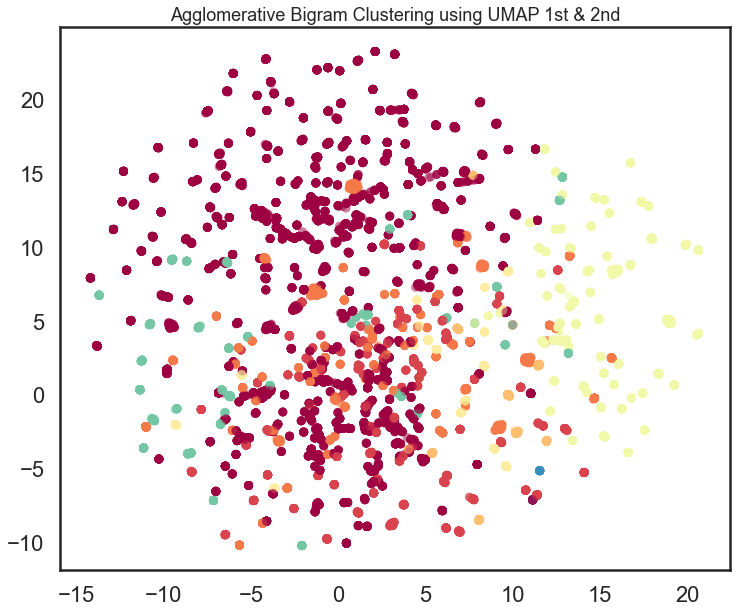

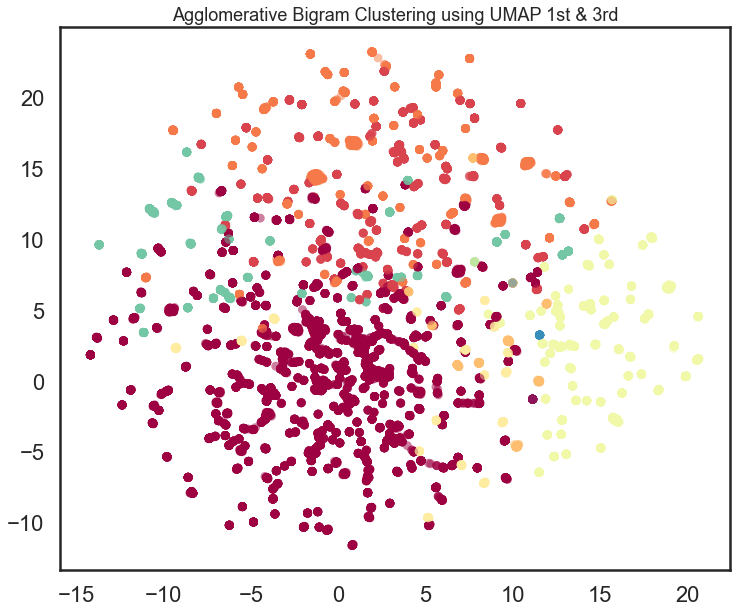

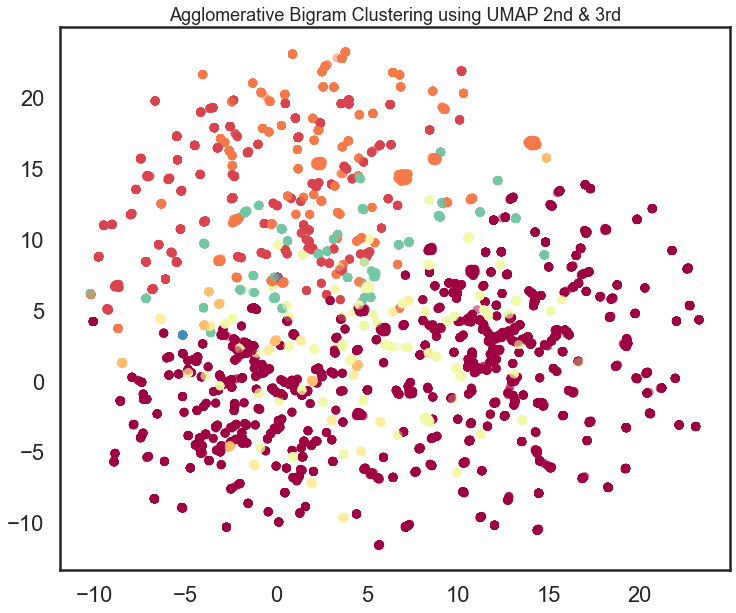

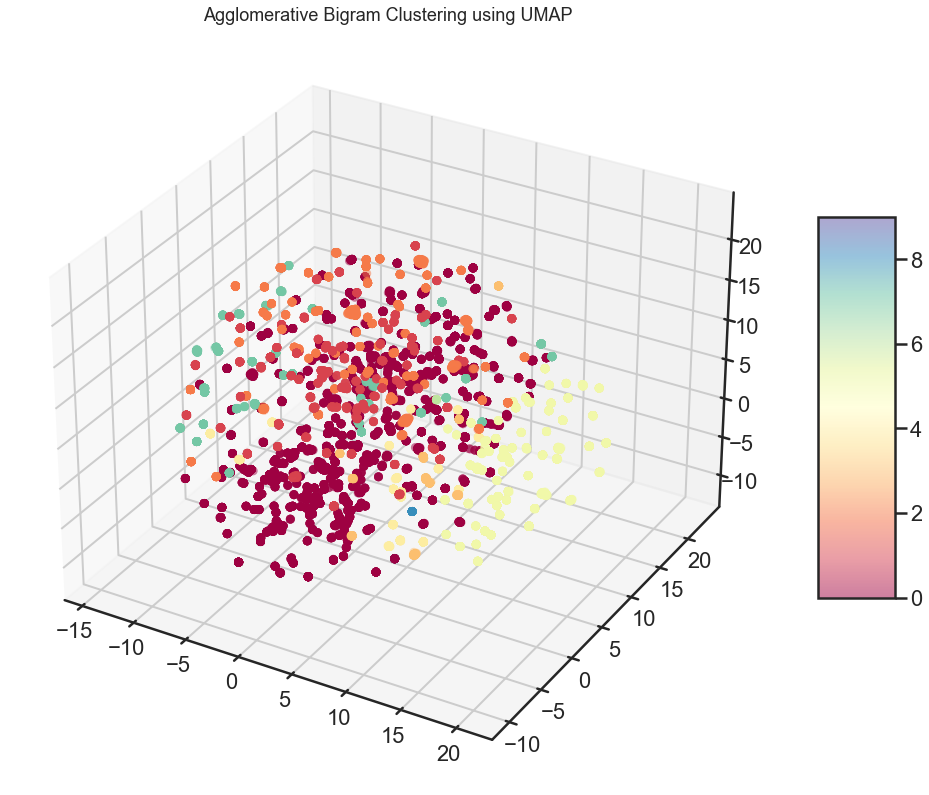

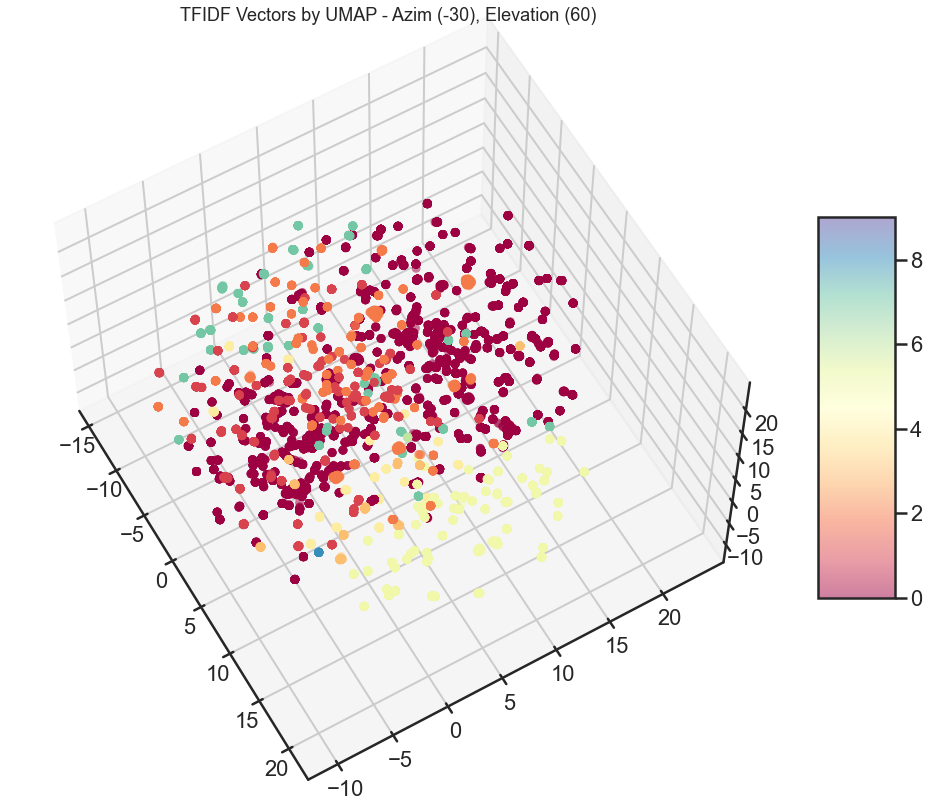

In [42]:
plot_clusters("Agglomerative Bigram Clustering using UMAP", tfidf_vectors, labels)

In [43]:
results = evaluate_clustering('Agglomerative Bigram Clustering', tfidf_vectors, log_labels, labels)
print(results)

['Agglomerative Bigram Clustering', '0.62', '0.91', '0.74', '0.79', '0.38', '0.74', '0.55', '0.17']


In [44]:
eval_results.append(results)

## Bigram Feature Vectorizer 2

In [45]:
tfidf_vectors = get_features(logs, 2, 100)

In [46]:
model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward", affinity="euclidean", compute_distances=True)
tfidf_vectors = tfidf_vectors.toarray()
model.fit(tfidf_vectors)

AgglomerativeClustering(compute_distances=True, n_clusters=10)

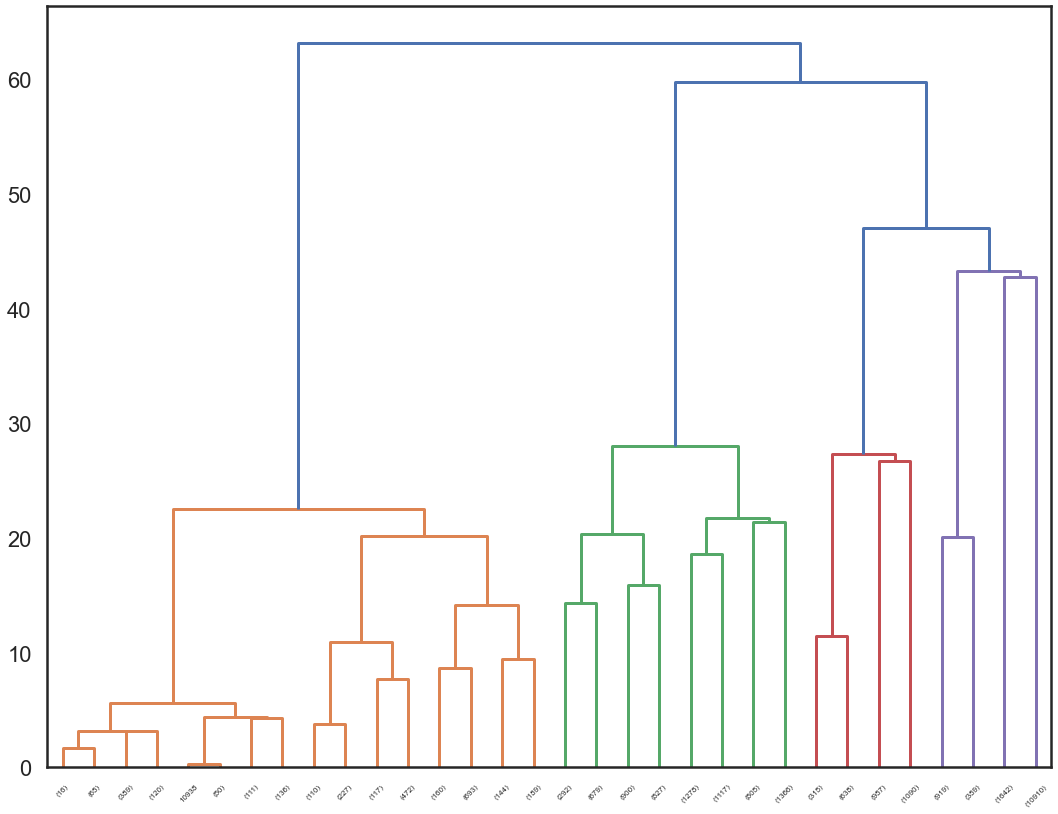

In [47]:
labels = model.labels_

plot_dendrogram(model, truncate_mode='level', p=4)

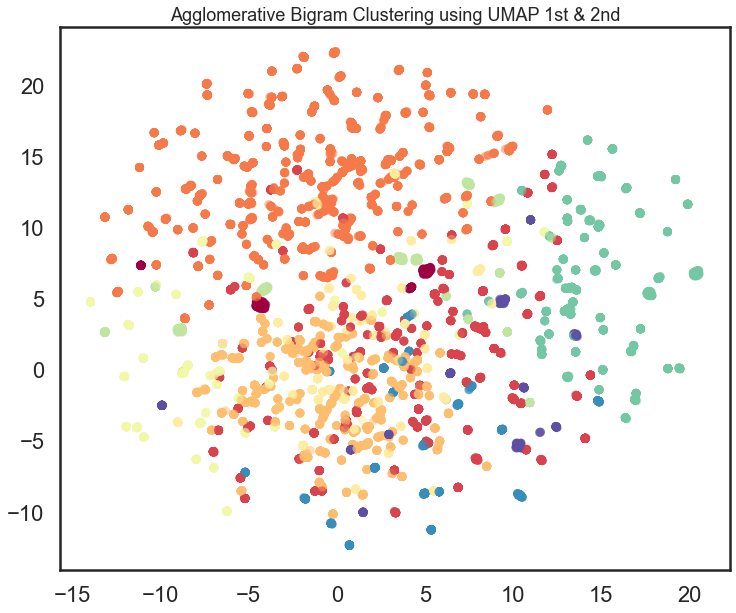

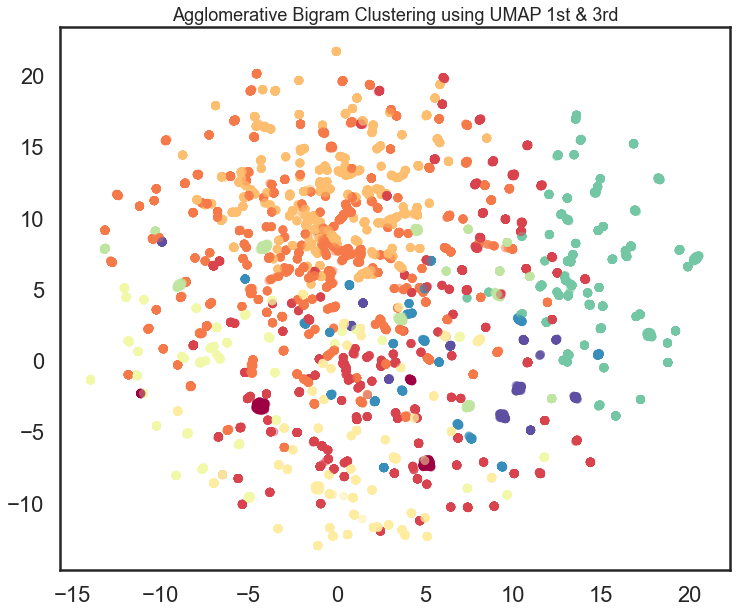

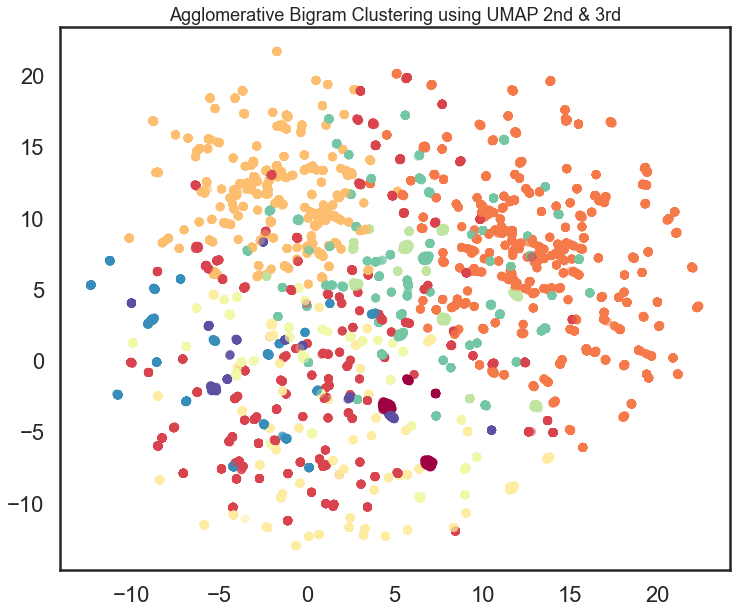

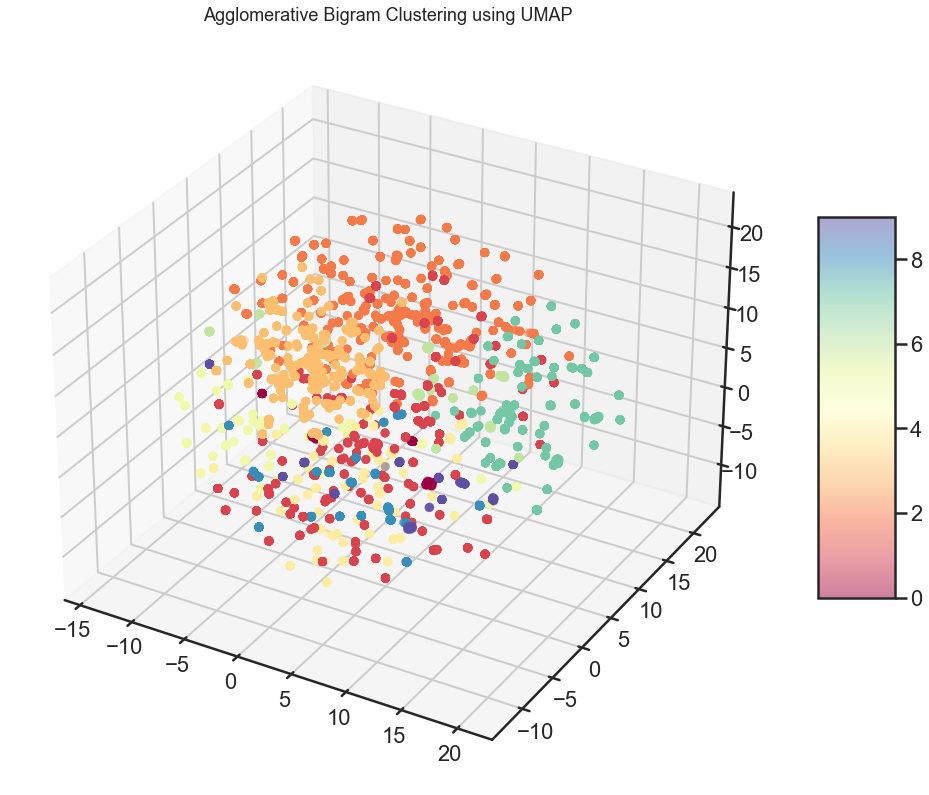

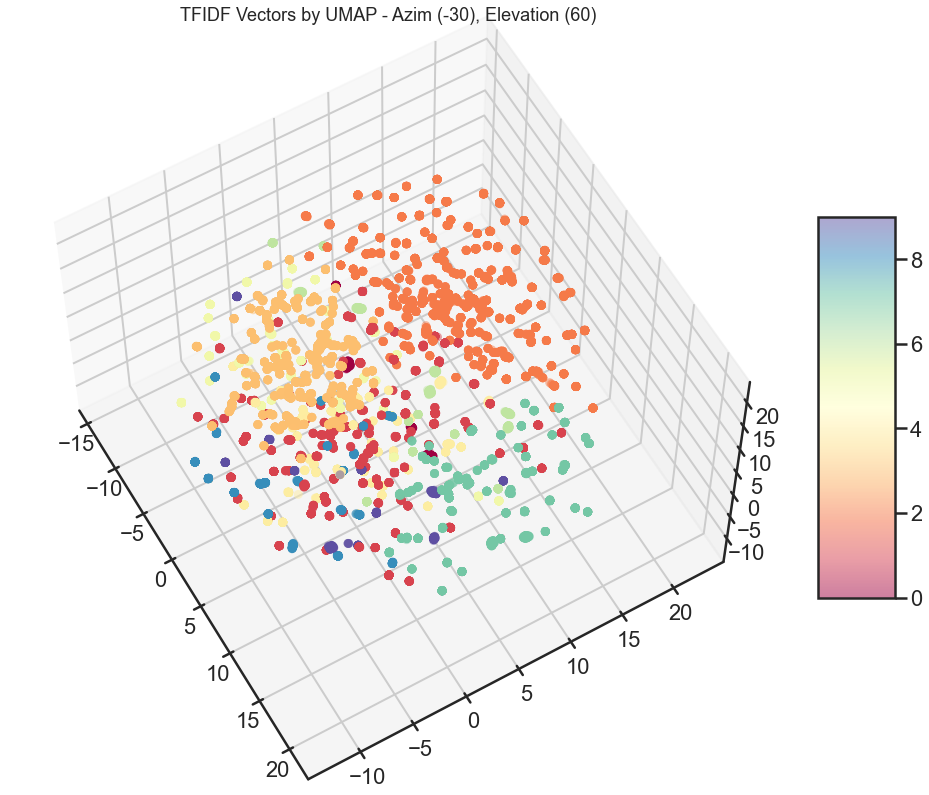

In [48]:
plot_clusters("Agglomerative Bigram Clustering using UMAP", tfidf_vectors, labels)

In [49]:
results = evaluate_clustering('Agglomerative Bigram Clustering (Ward)', tfidf_vectors, log_labels, labels)
print(results)

['Agglomerative Bigram Clustering (Ward)', '0.79', '0.85', '0.82', '0.91', '0.60', '0.82', '0.66', '0.25']


In [50]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [51]:
tfidf_vectors = get_features(logs, 3, 100)

In [52]:
model = AgglomerativeClustering(n_clusters=n_clusters, linkage="average", affinity="euclidean", compute_distances=True)
tfidf_vectors = tfidf_vectors.toarray()
model.fit(tfidf_vectors)

AgglomerativeClustering(compute_distances=True, linkage='average',
                        n_clusters=10)

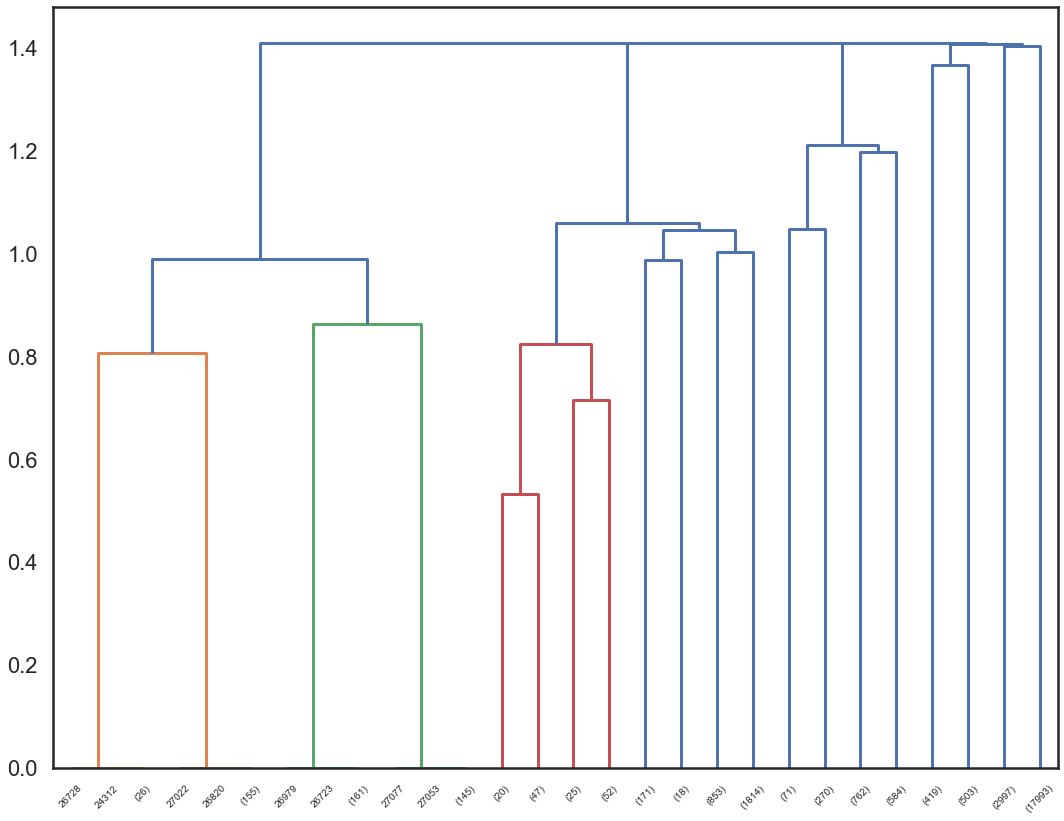

In [53]:
labels = model.labels_

plot_dendrogram(model, truncate_mode='level', p=4)

/opt/miniconda3/envs/fproject/lib/python3.9/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


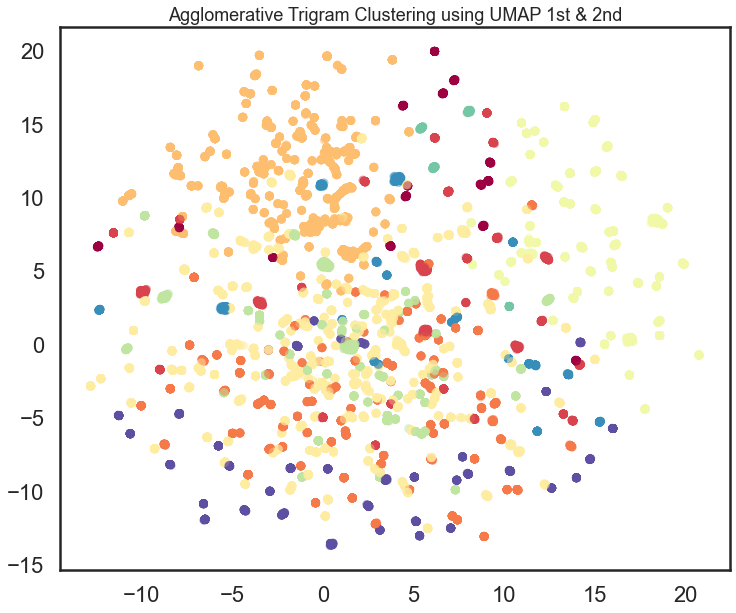

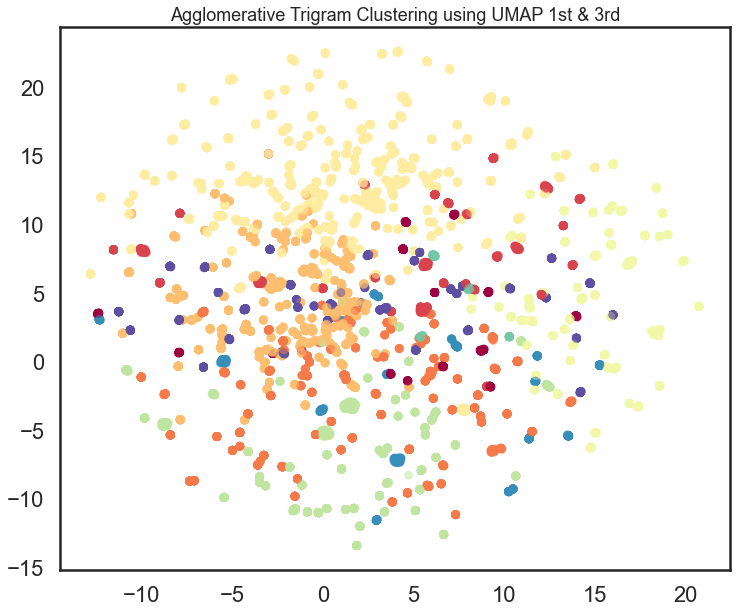

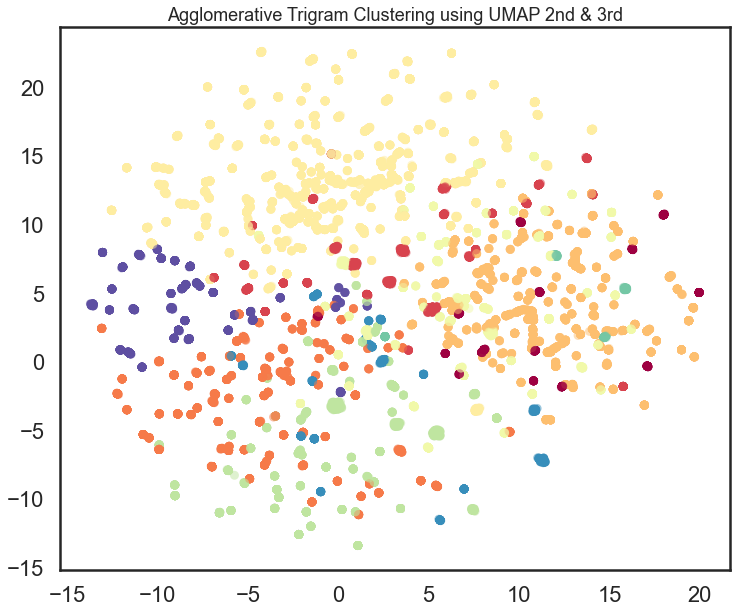

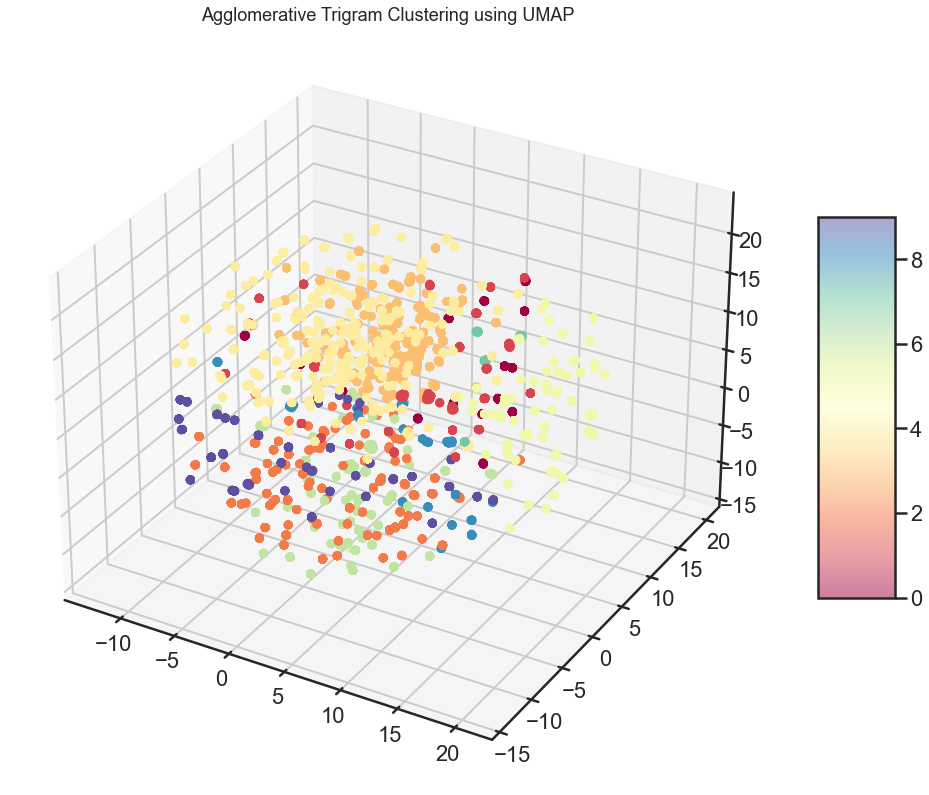

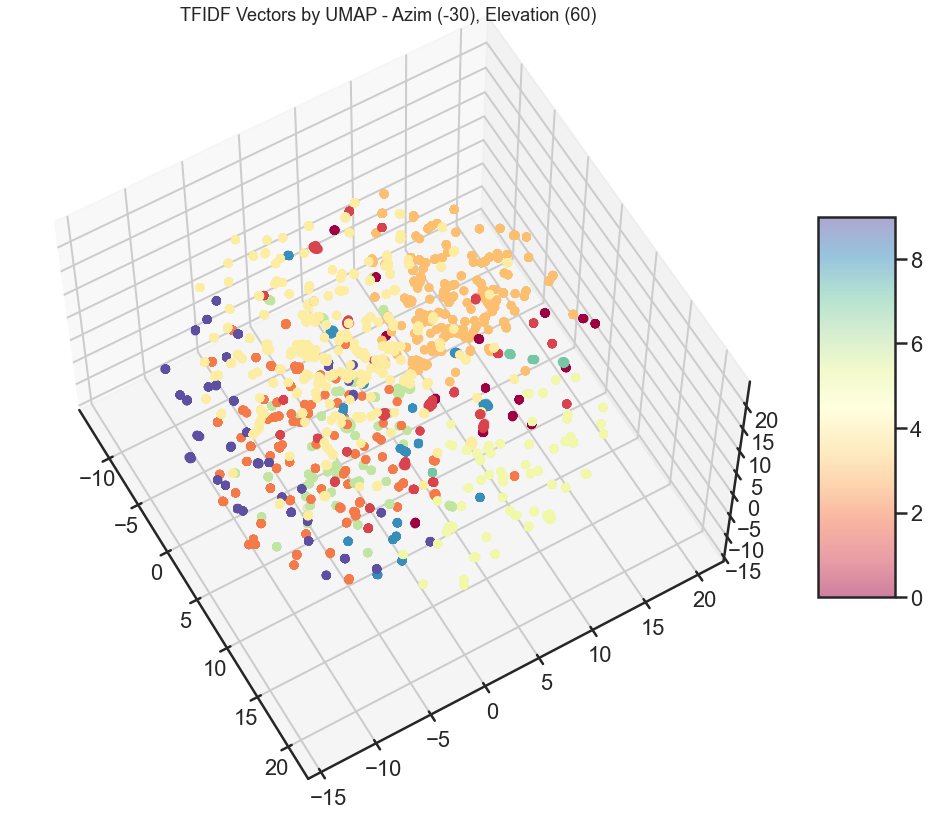

In [54]:
plot_clusters("Agglomerative Trigram Clustering using UMAP", tfidf_vectors, labels)

In [55]:
results = evaluate_clustering('Agglomerative Trigram Clustering', tfidf_vectors, log_labels, labels)
print(results)

['Agglomerative Trigram Clustering', '0.86', '0.94', '0.90', '0.94', '0.73', '0.90', '0.78', '0.21']


In [56]:
eval_results.append(results)

## Trigram Feature Vectorizer 2

In [57]:
tfidf_vectors = get_features(logs, 3, 100)

In [58]:
model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward", affinity="euclidean", compute_distances=True)
tfidf_vectors = tfidf_vectors.toarray()
model.fit(tfidf_vectors)

AgglomerativeClustering(compute_distances=True, n_clusters=10)

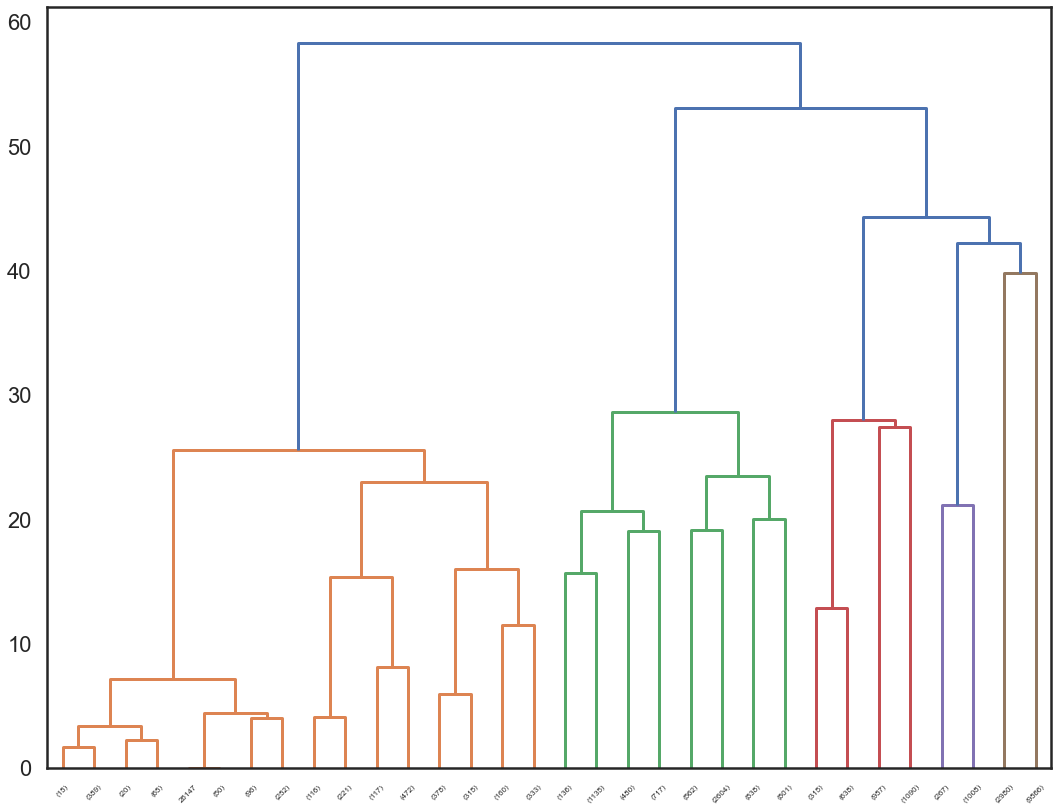

In [59]:
labels = model.labels_

plot_dendrogram(model, truncate_mode='level', p=4)

/opt/miniconda3/envs/fproject/lib/python3.9/site-packages/umap/spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


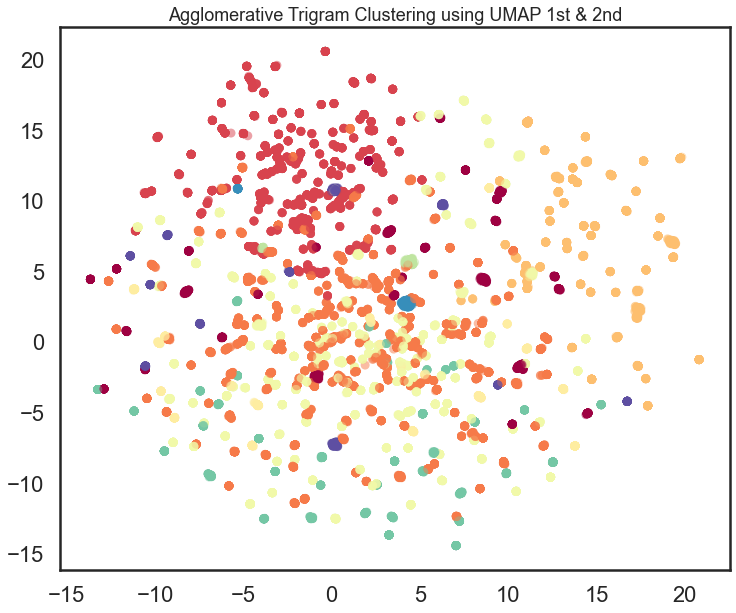

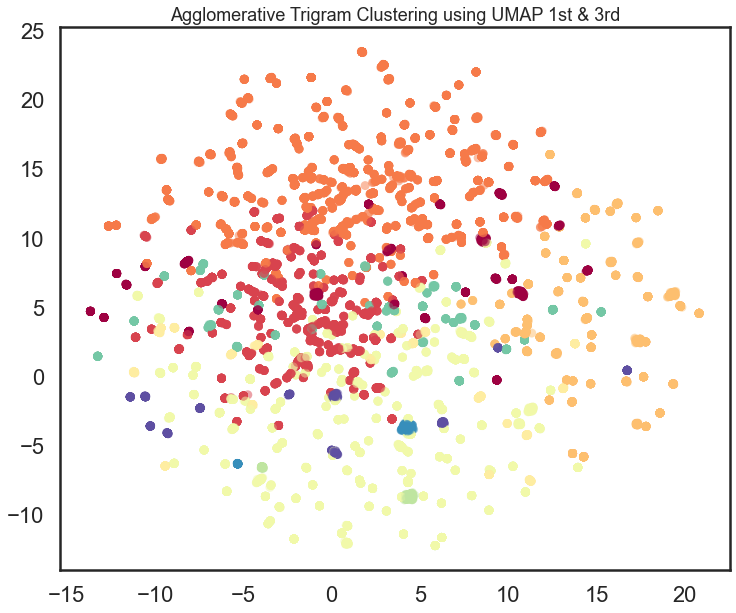

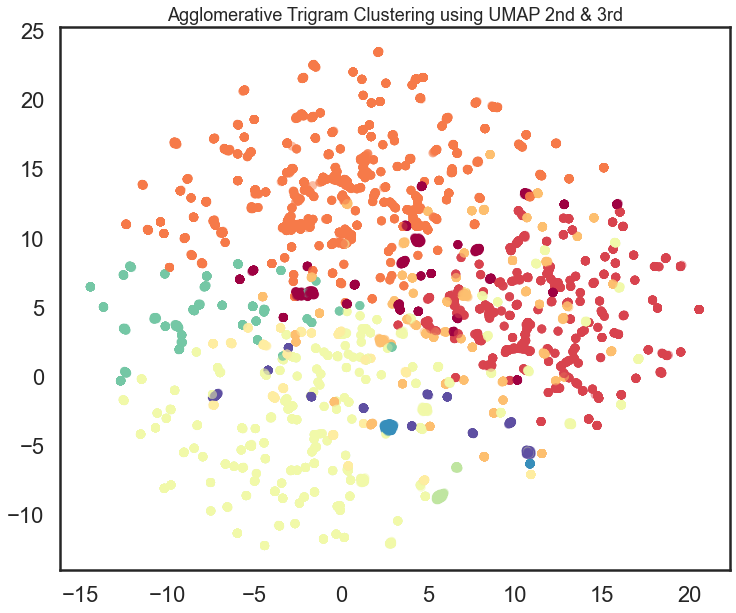

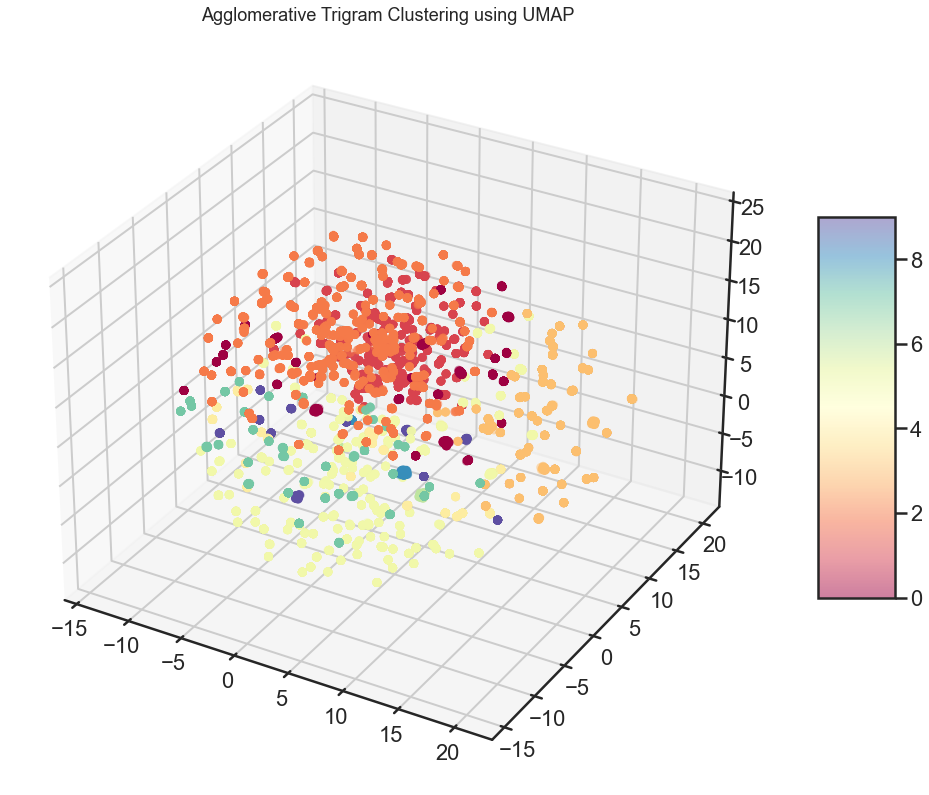

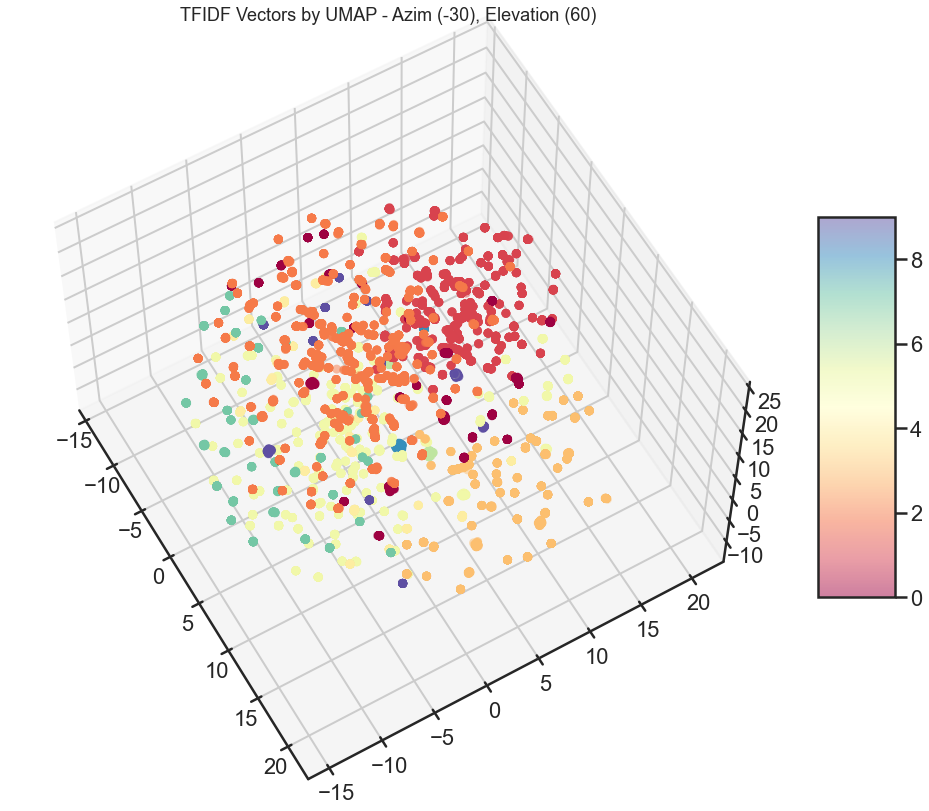

In [60]:
plot_clusters("Agglomerative Trigram Clustering using UMAP", tfidf_vectors, labels)

In [61]:
results = evaluate_clustering('Agglomerative Trigram Clustering (Ward)', tfidf_vectors, log_labels, labels)
print(results)

['Agglomerative Trigram Clustering (Ward)', '0.78', '0.86', '0.82', '0.91', '0.60', '0.82', '0.66', '0.23']


In [62]:
eval_results.append(results)

In [63]:
tabulate_results(eval_results)

+-----------------------------------------+-------------+--------------+-----------+------------+----------------+-------------------+-----------------+------------+
|                   Name                  | Homogeneity | Completeness | V Measure | Rand Score | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows | Silhouette |
+-----------------------------------------+-------------+--------------+-----------+------------+----------------+-------------------+-----------------+------------+
|     Agglomerative Bigram Clustering     |     0.62    |     0.91     |    0.74   |    0.79    |      0.38      |        0.74       |       0.55      |    0.17    |
|  Agglomerative Bigram Clustering (Ward) |     0.79    |     0.85     |    0.82   |    0.91    |      0.60      |        0.82       |       0.66      |    0.25    |
|     Agglomerative Trigram Clustering    |     0.86    |     0.94     |    0.90   |    0.94    |      0.73      |        0.90       |       0.78      |    0.21    |
| Ag